Organisation of globular clusters

In [54]:
# Python standard-library
from urllib.parse import urlencode
from urllib.request import urlretrieve


import pandas as pd
import numpy as np
import matplotlib

# Third-party dependencies
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy.io import ascii

from IPython.display import Image

from sklearn import cluster

# Set up matplotlib and use a nicer set of plot parameters
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
#clusters=[['ngc 2419',12],['Pal 3',12],['Pal 4',12],['ngc 4147',12],['ngc 5024',12],['M53',12],['ngc 5053',12],['ngc 5272',12]
#      ,['M3',12],['ngc 5466',12],['Pal 5',12],['ngc 5904',12],['M5',12],['Pal 14',12],['ngc 6205',12],['M13',12],
#     ['ngc 6341',12],['M92',12],['ngc 6838',12],['M71',12],['ngc 7006',12],['ngc 7078',12],['M15',12],['ngc 7089',12],['M2',12]]

clusters=[['ngc 2419',12],['Pal 3',12],['Pal 4',12],['ngc 4147',12],['ngc 5024',12],['M53',12],['ngc 5053',12],['ngc 5272',12]
      ,['M3',12],['ngc 5466',12],['Pal 5',12],['ngc 5904',12],['M5',12],['Pal 14',12],['ngc 6205',12],['M13',12],
     ['ngc 6341',12],['M92',12]]

#clusters=[['ngc 2419',2.92],['Pal 3',6.18],['Pal 4',2]]

print(len(clusters))
i=2
print(clusters[i])

sclus=clusters[i]
print(sclus[0])
print(sclus[1])
res = [None] * len(clusters)

18
['Pal 4', 12]
Pal 4
12


In [75]:
from astropy.table import Table, join, vstack
i=0
totlen=0
for clus in clusters:
    #print(clus[0])
    datfilename='globout/'+clus[0]+'.csv'
    tab=ascii.read(datfilename)
    res[i]=Table(tab, copy=True)

In [85]:
#datfilename='globout/allglobcs.csv'
#tab=ascii.read(datfilename)

clus=clusters[4]
datfilename='globout/'+clus[0]+'.csv'
tab=ascii.read(datfilename)

#tab=res[0]
newbigtable=Table(tab, copy=True)

print(newbigtable.info)

<Table length=2528>
 name  dtype 
----- -------
objid   int64
   ra float64
  dec float64
    u float64
    g float64
    r float64
    i float64
    z float64



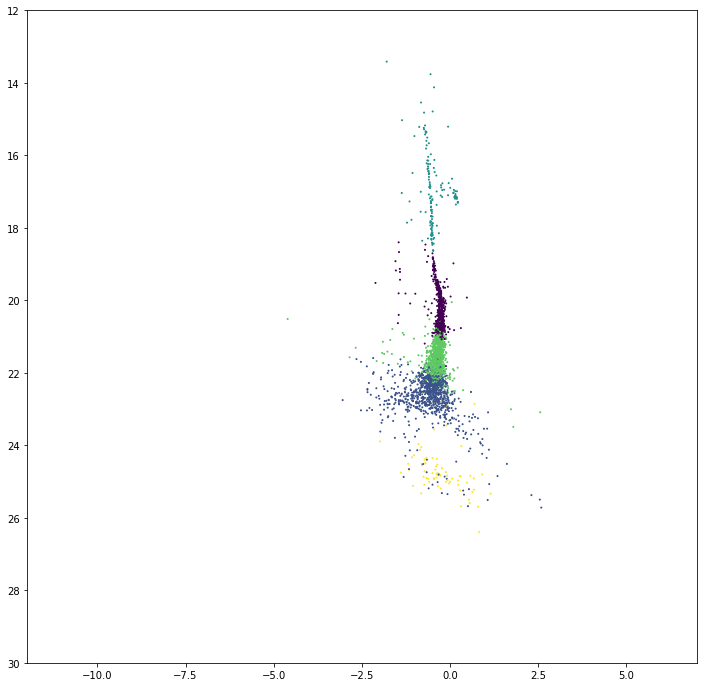

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 12))
#k_means = cluster.KMeans(n_clusters=3)
#clusdat=newbigtable[:]['u','g','r','i','z']
tclusdat = np.array([newbigtable['u'], newbigtable['g'], newbigtable['r'], newbigtable['i'], newbigtable['z']])
clusdat=np.transpose(tclusdat)
#print(clusdat.info)
#print(newbigtable[1000]['u','g','r','i','z'])
#print(newbigtable[1000][3:7])
#print(clusdat[0:4,1000:1005])
#k_means = cluster.KMeans(n_clusters=5)
#res=k_means.fit(clusdat) 
#k_means = cluster.KMeans(n_clusters=3)
#k_means.fit(X_iris) 
#labels = k_means.labels_


# Number of clusters
#kmeans = KMeans(n_clusters=5)
# Fitting the input data
#kmeans = KMeans.fit(clusdat)
# Getting the cluster labels
#labels = KMeans.predict(clusdat)
# Centroid values
#centroids = KMeans.cluster_centers_
#y_pred = KMeans(n_clusters=5, random_state=clusdat).fit_predict(clusdat)

#y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(clusdat)
# Getting the cluster labels
labels = kmeans.predict(clusdat)
# Centroid values
centroids = kmeans.cluster_centers_
y=kmeans.fit_predict(clusdat)


#cluster.KMeans(n_clusters=3).fit(clusdat)
#labels = cluster.labels
plt.ylim(30,12)
#plt.ylim(30,12)
plt.xlim(-12,7)
#plt.subplot(221)
#plt.scatter(clusdat[0, :], clusdat[1, :],s=1)
#plt.scatter(clusdat[:, 0], clusdat[:,1],s=1,c=labels)
plt.scatter(clusdat[:,2]-clusdat[:,1],clusdat[:, 2],s=1,c=labels)



#print(k_means.labels_[::10])

In [72]:
print(labels)
print(y)
#print(clusdat)
print(np.shape(clusdat))
#print(clusdat[0:4,1000:1005])
#print(y_pred)
print(centroids)

[3 1 3 ... 9 0 9]
[ 4  1  4 ... 13  6 13]
(1007, 5)
[[23.88704686 23.1979686  22.33602    21.98959711 22.00914529]
 [19.65098978 18.30368065 17.87479043 17.78616087 17.68002196]
 [20.95752273 20.05300232 19.74489293 19.62768848 19.68689273]
 [16.19245733 14.83993867 14.40894733 14.52072067 14.110608  ]
 [21.83577657 20.98522181 20.49354324 20.35355676 20.26330067]
 [25.10564326 22.82709685 22.07650337 21.75463292 21.66638787]
 [18.44377848 17.10376061 16.62425    16.43867182 16.36835273]
 [22.53073667 23.69920267 24.16972467 23.60324867 22.90683533]
 [22.89512051 21.5949841  21.03657513 20.80044863 20.7799141 ]
 [24.82266438 24.01503429 22.85702352 22.60502124 22.43226667]
 [22.95632455 20.47433455 18.97427    18.25583227 17.86015455]
 [24.59125219 25.12256781 23.68297156 21.65397344 21.71294281]
 [20.05255726 19.1008571  18.85108597 18.76226532 18.76753016]
 [24.4998272  23.6189276  21.9986916  20.6796108  20.0039744 ]
 [23.71919248 22.2385638  21.58506413 21.32550686 21.32713033]]


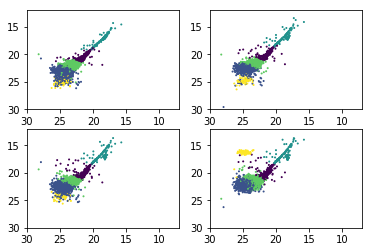

In [87]:

plt.subplot(221)
plt.ylim(30,12)
plt.xlim(30,7)
j=0
plt.scatter(clusdat[:, j], clusdat[:,1],s=1,c=labels)
plt.subplot(222)
plt.ylim(30,12)
plt.xlim(30,7)
plt.scatter(clusdat[:, j], clusdat[:,2],s=1,c=labels)
plt.subplot(223)
plt.ylim(30,12)
plt.xlim(30,7)
plt.scatter(clusdat[:, j], clusdat[:,3],s=1,c=labels)
plt.subplot(224)
plt.ylim(30,12)
plt.xlim(30,7)
plt.scatter(clusdat[:, j], clusdat[:,4],s=1,c=labels)